In [2]:
import os
from keras.preprocessing.image import ImageDataGenerator

base_dir = "/Documents/fire-detection"  # Replace with the actual base directory path

training_dir = "Datasets 1-2/Training"
validation_dir =  "Datasets 1-2/Validation"

training_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=30,
    height_shift_range=0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    training_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=16
)


Found 3024 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [3]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 384)         0

In [4]:

history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 15
    
)

Epoch 1/10
15/15 [==============================] - 53s 3s/step - loss: 1.0063 - acc: 0.6009 - val_loss: 0.5380 - val_acc: 0.7448
Epoch 2/10
15/15 [==============================] - 59s 4s/step - loss: 0.5780 - acc: 0.7029 - val_loss: 0.4573 - val_acc: 0.8243
Epoch 3/10
15/15 [==============================] - 51s 3s/step - loss: 0.4431 - acc: 0.8289 - val_loss: 0.5426 - val_acc: 0.8243
Epoch 4/10
15/15 [==============================] - 47s 3s/step - loss: 0.4500 - acc: 0.7979 - val_loss: 0.4263 - val_acc: 0.8452
Epoch 5/10
15/15 [==============================] - 56s 4s/step - loss: 0.3548 - acc: 0.8479 - val_loss: 0.3731 - val_acc: 0.8787
Epoch 6/10
15/15 [==============================] - 53s 4s/step - loss: 0.3071 - acc: 0.8640 - val_loss: 0.3392 - val_acc: 0.9038
Epoch 7/10
15/15 [==============================] - 51s 3s/step - loss: 0.3323 - acc: 0.8635 - val_loss: 0.3472 - val_acc: 0.8828
Epoch 8/10
15/15 [==============================] - 49s 3s/step - loss: 0.3999 - acc: 0.84

In [ ]:
!curl -L "https://universe.roboflow.com/ds/9UNEzsyb6e?key=4goarGAALs" &gt; roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [6]:
import numpy as np
from keras.preprocessing import image

# Assuming you have already loaded and defined the 'model' variable

image_path = 'OIP.jpg'
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0) / 255.0  # Normalize the image by dividing by 255.0
classes = model.predict(x)
prediction = np.argmax(classes[0])  # Get the index of the predicted class
confidence = classes[0][prediction]  # Get the confidence/probability of the predicted class

print(prediction == 0, confidence)


1/1 [==============================] - 0s 113ms/step
True 0.98849654


Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Epoch 1/10
15/15 [==============================] - 18s 1s/step - loss: 1.0980 - acc: 0.5479 - val_loss: 0.7933 - val_acc: 0.0667
Epoch 2/10
15/15 [==============================] - 16s 1s/step - loss: 0.6227 - acc: 0.6708 - val_loss: 0.3914 - val_acc: 0.7333
Epoch 3/10
15/15 [==============================] - 16s 1s/step - loss: 0.6476 - acc: 0.6360 - val_loss: 0.6336 - val_acc: 0.6000
Epoch 4/10
15/15 [==============================] - 17s 1s/step - loss: 0.4809 - acc: 0.8125 - val_loss: 0.8906 - val_acc: 0.6667
Epoch 5/10
15/15 [==============================] - 16s 1s/step - loss: 0.4577 - acc: 0.7937 - val_loss: 0.1849 - val_acc: 0.8000
Epoch 6/10
15/15 [==============================] - 17s 1s/step - loss: 0.3602 - acc: 0.8646 - val_loss: 0.1422 - val_acc: 0.9333
Epoch 7/10
15/15 [==============================] - 16s 1s/step - loss: 0.3265 - acc: 0.8729 - val_loss: 0.6656 - val_acc: 0.7333
Epoch 8/10
15/15 [==============================] - 16s 1s/step - loss: 0.2808 - acc: 0.87

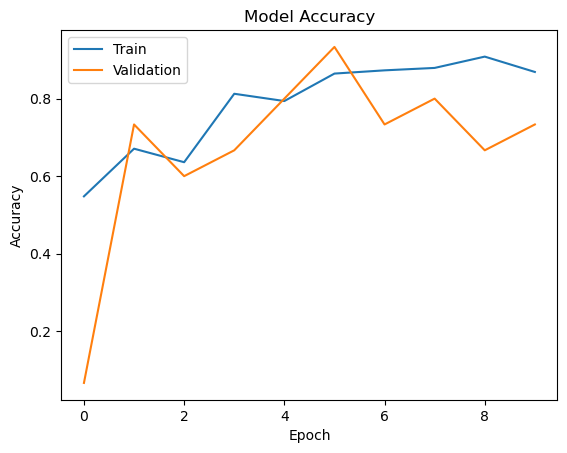

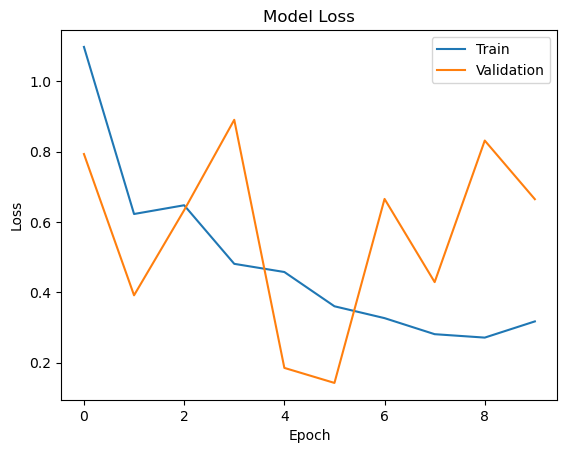

200/200 [==============================] - 3s 14ms/step
Accuracy: 0.835
F1 Score: 0.8307692307692308
[[86 14]
 [19 81]]

Score Table:
Metric     Score     
Accuracy   0.835     
F1 Score   0.8307692307692308


In [9]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Assuming you have already loaded and defined the 'model' variable

TRAIN_DIR = "Dataset 3/Train"
TEST_DIR = "Dataset 3/Test"

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up training data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

# Set up test data generator
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=1,
    shuffle=False
)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(256, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Conv2D(384, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['acc'])

# Train the model and obtain the history object
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=10,
    validation_data=test_generator,
    validation_steps=15
)

# Plot accuracy over epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Make predictions on the test data
test_predictions = model.predict(test_generator)
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print('Accuracy:', accuracy)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print('F1 Score:', f1)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# Print scores in a table
score_table = [['Metric', 'Score'],
               ['Accuracy', accuracy],
               ['F1 Score', f1]]
print('\nScore Table:')
for row in score_table:
    print('{:<10} {:<10}'.format(row[0], row[1]))


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

# Assuming you have already loaded and defined the 'model' variable

TEST_DIR = "Dataset 3/Test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=1,
    shuffle=False
)

model = tf.keras.models.load_model('Fire_detection.keras')

# Make predictions on the test data
test_predictions = model.predict(test_generator)
predicted_labels = np.argmax(test_predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print scores in a table
score_table = pd.DataFrame(
    {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    }
)
print(score_table)
print('\nConfusion Matrix:')
print(cm)


Found 200 images belonging to 2 classes.
200/200 [==============================] - 3s 13ms/step
      Metric     Score
0   Accuracy  0.815000
1  Precision  0.909091
2     Recall  0.700000
3   F1 Score  0.790960

Confusion Matrix:
[[93  7]
 [30 70]]


In [13]:
model.save('Fire_detection.h5')